<a href="https://colab.research.google.com/github/sakshi-sketch/Loan_approval_prediction/blob/main/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl

In [ ]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.shape

(4269, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

<Axes: >

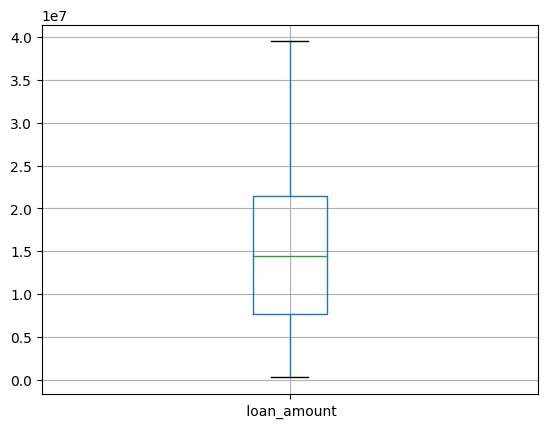

In [ ]:
df.boxplot(column=' loan_amount')

In [ ]:
pd.crosstab(df[' income_annum'],df[' loan_status'],margins=True)

loan_status,Approved,Rejected,All
income_annum,,,
200000,29,13,42
300000,30,21,51
400000,27,8,35
500000,29,17,46
600000,26,23,49
...,...,...,...
9600000,18,21,39
9700000,25,15,40
9800000,33,15,48


In [ ]:
pd.crosstab(df[' loan_status'],df[' loan_amount'],margins=True)

loan_amount,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,...,37800000,37900000,38000000,38200000,38400000,38500000,38700000,38800000,39500000,All
loan_status,,,,,,,,,,,,,,,,,,,,,
Approved,2,7,9,7,11,10,6,4,14,10,...,1,1,0,2,1,1,2,1,1,2656
Rejected,4,0,7,6,4,5,6,6,4,7,...,1,1,1,1,0,0,0,0,0,1613
All,6,7,16,13,15,15,12,10,18,17,...,2,2,1,3,1,1,2,1,1,4269


<Axes: >

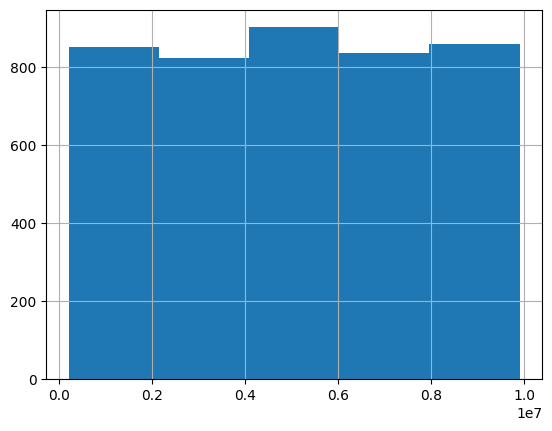

In [ ]:
df[' income_annum'].hist(bins=5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df[" education"] = le.fit_transform(df[" education"])
df[" self_employed"] = le.fit_transform(df[" self_employed"])
df[" loan_status"] = le.fit_transform(df[" loan_status"])

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
df.describe().style.background_gradient(cmap="Reds")

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000
mean,2135.000000,2.498712,0.497775,0.503631,5059123.916608,15133450.456781,10.900445,599.936051,7472616.537831,4973155.305692,15126305.926446,4976692.433825,0.377840
std,1232.498479,1.695910,0.500054,0.500045,2806839.831818,9043362.984843,5.709187,172.430401,6503636.587664,4388966.089638,9103753.665256,3250185.305696,0.484904
min,1.000000,0.000000,0.000000,0.000000,200000.000000,300000.000000,2.000000,300.000000,-100000.000000,0.000000,300000.000000,0.000000,0.000000
25%,1068.000000,1.000000,0.000000,0.000000,2700000.000000,7700000.000000,6.000000,453.000000,2200000.000000,1300000.000000,7500000.000000,2300000.000000,0.000000
50%,2135.000000,3.000000,0.000000,1.000000,5100000.000000,14500000.000000,10.000000,600.000000,5600000.000000,3700000.000000,14600000.000000,4600000.000000,0.000000
75%,3202.000000,4.000000,1.000000,1.000000,7500000.000000,21500000.000000,16.000000,748.000000,11300000.000000,7600000.000000,21700000.000000,7100000.000000,1.000000
max,4269.000000,5.000000,1.000000,1.000000,9900000.000000,39500000.000000,20.000000,900.000000,29100000.000000,19400000.000000,39200000.000000,14700000.000000,1.000000


In [ ]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
import seaborn as sns

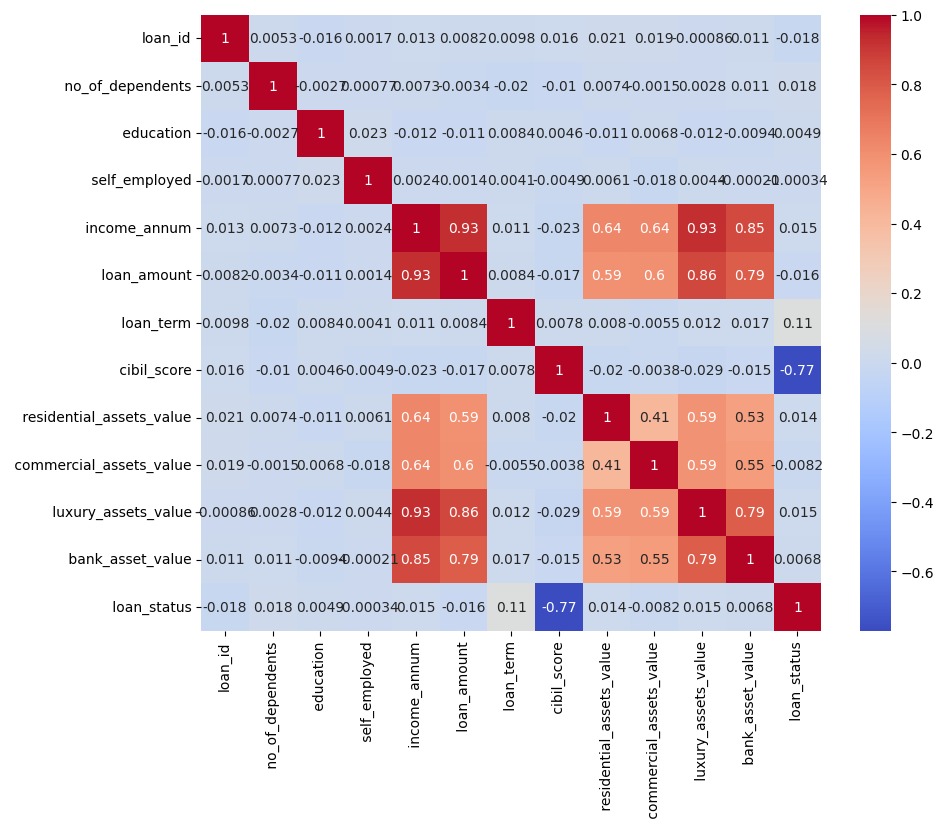

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()

Data Split and preparation

In [ ]:
x = df.drop([' loan_status'],axis = 1 )# dataframe without target variable
y = df[' loan_status'] # dataframe containing target variable


from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Check for missing values in x_train and y_train


Decision Tree

In [ ]:
x = df.drop([" loan_status"],axis=1)
y = df[" loan_status"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       264
           1       0.77      0.45      0.57       163

    accuracy                           0.74       427
   macro avg       0.75      0.68      0.69       427
weighted avg       0.74      0.74      0.72       427

Accuracy of Logistic Regression is :  73.77049180327869


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("mean_Squared_error :" ,mean_squared_error(y_test,regpred))

print("mean_absolute_error :",mean_absolute_error(y_test,regpred))

print("root mean square error :" ,np.sqrt(mean_squared_error(y_test,regpred)))

print("r2_score :",r2_score(y_test,regpred))

mean_Squared_error : 0.26229508196721313
mean_absolute_error : 0.26229508196721313
root mean square error : 0.5121475197315839
r2_score : -0.11135898865960203


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(x_train,y_train)

dtpred = dtc.predict(x_test)

print ("Classification report :" ,classification_report(y_test,dtpred))


print("Accuracy report:" , accuracy_score(y_test,dtpred)*100)

Classification report :               precision    recall  f1-score   support

           0       0.99      1.00      0.99       264
           1       0.99      0.98      0.99       163

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427

Accuracy report: 99.06323185011709


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("mean_Squared_error :" ,mean_squared_error(y_test,dtpred))

print("mean_absolute_error :",mean_absolute_error(y_test,dtpred))

print("root mean square error :" ,np.sqrt(mean_squared_error(y_test,dtpred)))

print("r2_score :",r2_score(y_test,dtpred))

mean_Squared_error : 0.00936768149882904
mean_absolute_error : 0.00936768149882904
root mean square error : 0.09678678369916545
r2_score : 0.9603086075478714


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)

rfc.fit(x_train,y_train)

rfcpred = rfc.predict(x_test)

print(classification_report(y_test,rfcpred))

print("accuracy score is :",accuracy_score(y_test,rfcpred)*100)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       264
           1       1.00      0.95      0.97       163

    accuracy                           0.98       427
   macro avg       0.99      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427

accuracy score is : 98.12646370023418


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("mean_Squared_error :" ,mean_squared_error(y_test,rfcpred))

print("mean_absolute_error :",mean_absolute_error(y_test,rfcpred))

print("root mean square error :" ,np.sqrt(mean_squared_error(y_test,rfcpred)))

print("r2_score :",r2_score(y_test,rfcpred))

mean_Squared_error : 0.01873536299765808
mean_absolute_error : 0.01873536299765808
root mean square error : 0.13687718216583097
r2_score : 0.9206172150957427


model performance evaluation



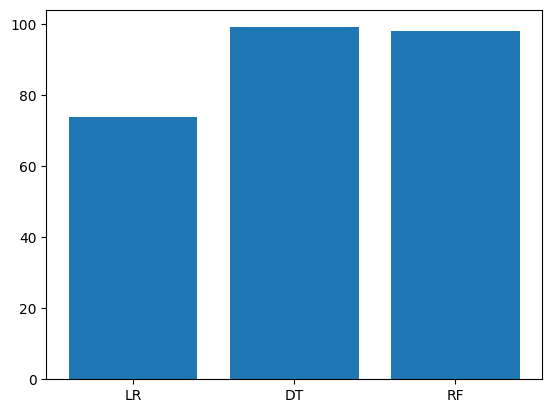

In [ ]:
LR = accuracy_score(y_test,regpred)*100 #logistic regression
DT = accuracy_score(y_test,dtpred)*100 #decision tree
RF = accuracy_score(y_test,rfcpred)*100 #random forest

Model = ['LR','DT','RF']
Score = [LR, DT, RF]
barplot = plt.bar(x=Model,height=Score)
plt.show()

In [ ]:
importances = rfc.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

                      feature  importance
7                 cibil_score    0.808274
6                   loan_term    0.058830
5                 loan_amount    0.025285
10        luxury_assets_value    0.017611
0                     loan_id    0.016708
8    residential_assets_value    0.016133
4                income_annum    0.016066
9     commercial_assets_value    0.015380
11           bank_asset_value    0.013979
1            no_of_dependents    0.007211
3               self_employed    0.002390
2                   education    0.002133


In [ ]:
pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.0 MB/s et

In [ ]:
import gradio as gr

# Dummy loan approval function
def loan_approval(loan_id, no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value):
    # Simple logic for demonstration: Approve if income > loan_amount * 2 and cibil_score > 600
    if income_annum > loan_amount * 2 and cibil_score > 600:
        return f"Loan ID {loan_id}: Congratulations, your loan is approved!"
    else:
        return f"Loan ID {loan_id}: Sorry, your loan application is denied."

# Create Gradio interface
iface = gr.Interface(
    fn=loan_approval,
    inputs=[
        gr.Textbox(label="Loan ID"),
        gr.Number(label="Number of Dependents"),
        gr.Textbox(label="Education"),
        gr.Checkbox(label="Self Employed"),
        gr.Number(label="Annual Income"),
        gr.Number(label="Loan Amount"),
        gr.Number(label="Loan Term"),
        gr.Number(label="CIBIL Score"),
        gr.Number(label="Residential Assets Value"),
        gr.Number(label="Commercial Assets Value"),
        gr.Number(label="Luxury Assets Value"),
        gr.Number(label="Bank Asset Value")
    ],
    outputs="text",
    title="Loan Approval System",
    description="Enter the loan details to see if you qualify for a loan."
)

# Launch the interface
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://87cfd57ca857061935.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
